# End-to-End NLP and Deep Learning Project for Six Human Emotion Classification App
===================================================================================
["Love","Fear","Anger","Sadness","Joy","Surprise"]

We will use in this Project.
* NLP Preprocessing Pipeline
* Machine Leaning Algorithms
* Deep Learning(LSTM)
* Saving Files and Creating Apps

In [ ]:
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install nltk

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import tensorflow as tf
print(tf.__version__)

2.16.1


## Load Libraries

In [5]:
#Deep Learning Packages
from keras.models import Sequential
from keras.layers import Embedding,LSTM, Dense,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
#Machine Learning Packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## Load Data

In [6]:
train_data = pd.read_csv("Emotion.txt",sep=';',header=None,names=['Comments','Emotion'],encoding='utf-8')
train_data.head(5)

,Comments,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
train_data.shape

(16000, 2)

In [8]:
train_data.isnull().sum()

Comments    0
Emotion     0
dtype: int64

In [9]:
#get all word length in comments
train_data['length']=[len(x) for x in train_data['Comments']]

In [10]:
train_data.head(5)

,Comments,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [11]:
train_data.duplicated().sum()

1

In [12]:
train_data.drop_duplicates(inplace=True)
train_data.duplicated().sum()

0

## Exploratory Data Analysis 

In [13]:
train_data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

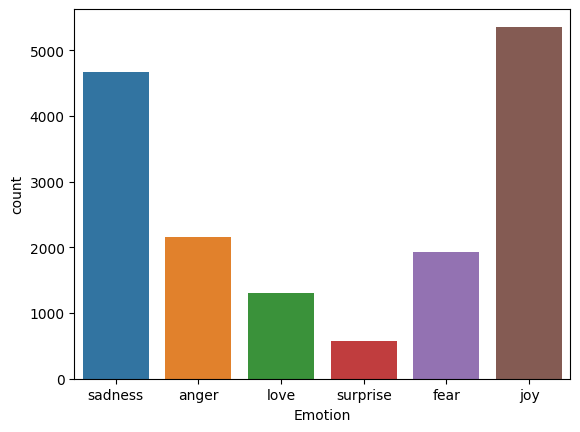

In [14]:
sns.countplot(x=train_data['Emotion'])
plt.show()

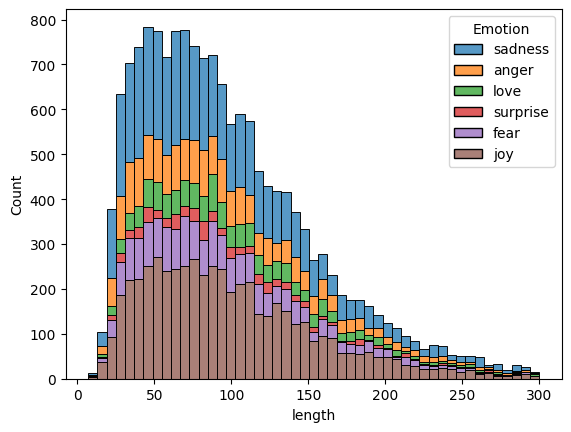

In [15]:
#data distribution
df2 = train_data.copy()
#convert the length column to numpy array
length_vlaues=df2['length'].values
#use sns.histplot instead of sns.kdeplot for simplicity 
sns.histplot(data=df2,x='length',hue='Emotion',multiple='stack')
plt.show()

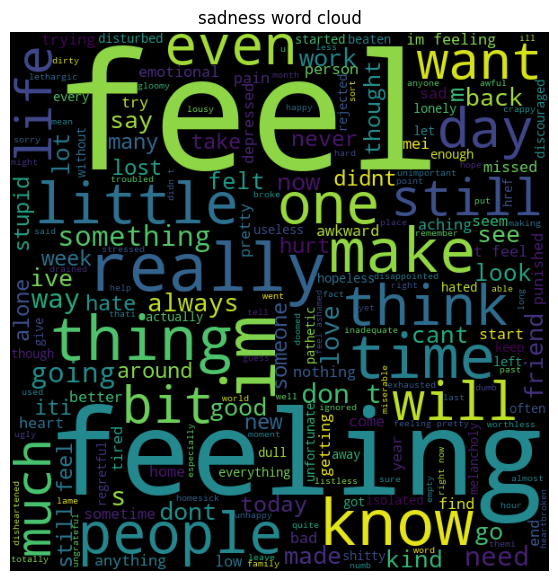

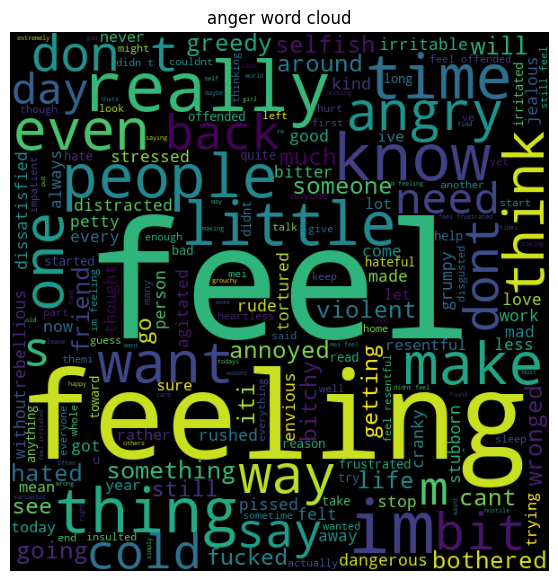

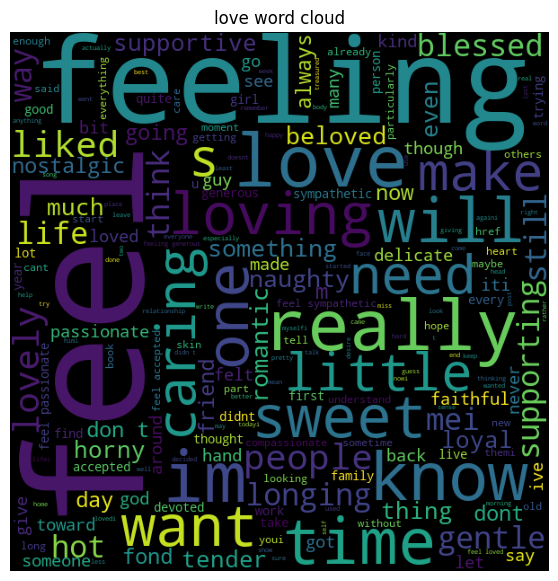

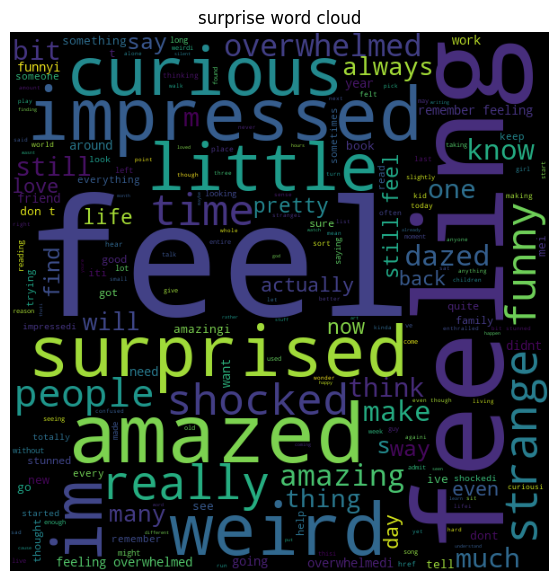

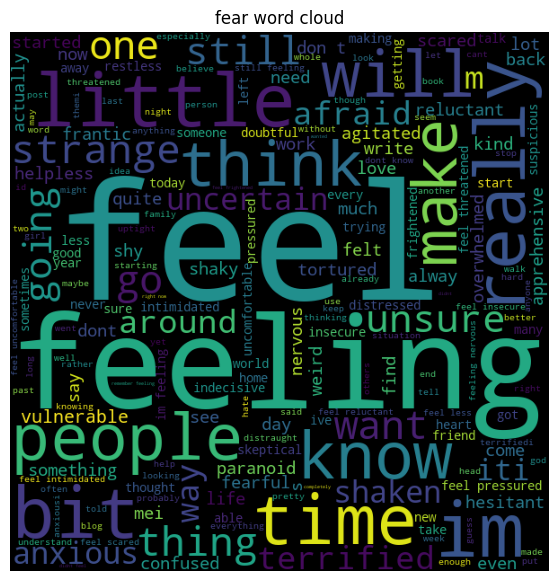

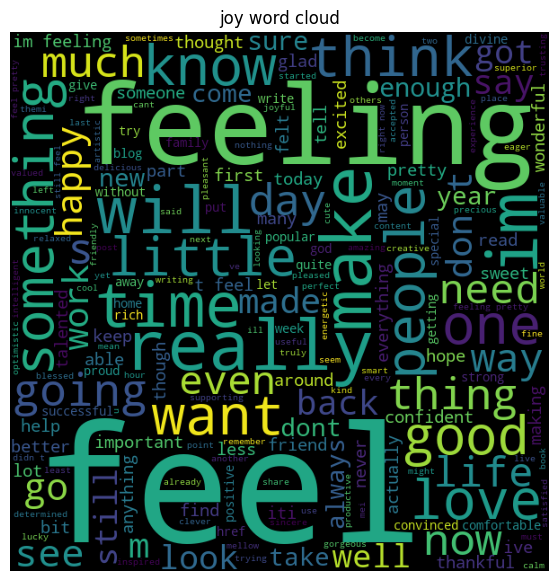

In [16]:
#word Cloud of each Emotion
def words_cloud(wordcloud,emotion):
    plt.figure(figsize=(7,7))
    plt.title(emotion+" word cloud")
    plt.imshow(wordcloud)
    plt.axis('off')

emotion_list = train_data['Emotion'].unique()
for emotion in emotion_list:
    text = "".join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion,'Comments']])
    wordcloud= WordCloud(width=600,height=600).generate(text)
    words_cloud(wordcloud,emotion)
  

## Data Preprocessing

### Encode Emotion

In [17]:
le = LabelEncoder()
train_data['Emotion_Encoded']=le.fit_transform(train_data['Emotion'])
train_data

,Comments,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


### Applying Machine Learning

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report 

In [19]:
df = train_data.copy() #copy df from train_data because we will use this for next deep learning task

In [20]:
df

,Comments,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [21]:
# Data Cleaning and Preprocessing
#Download NLTK stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]"," ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
df['cleaned-comment']=df['Comments'].apply(clean_text)

In [22]:
df

,Comments,Emotion,length,Emotion_Encoded,cleaned-comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [23]:
#Train_Test_Split
x_train,x_test,y_train,y_test=train_test_split(df['cleaned-comment'],df['Emotion_Encoded'],test_size=0.2,random_state=42)

In [24]:
#Vectorization Using TF-IDF
tfidf_vectorizer=TfidfVectorizer()
x_train_tfidf=tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf=tfidf_vectorizer.transform(x_test)

In [25]:
classifiers  = {
    "Multinomial Naive Bayes":MultinomialNB(),
    "Logistic Regression" : LogisticRegression(),
    "Random Forest ":RandomForestClassifier(),
    "Support Vector Machine": SVC()
}
for name,clf in classifiers.items():
    print(f"\n============{name}=============")
    clf.fit(x_train_tfidf,y_train)
    y_pred_tfidf= clf.predict(x_test_tfidf)
    
    print(f"\nAccuracy using TF-IDF:{accuracy_score(y_test,y_pred_tfidf)}")
    print("Classification Report:")
    print(classification_report(y_test,y_pred_tfidf))


============Multinomial Naive Bayes=============

Accuracy using TF-IDF:0.6590625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


============Logistic Regression=============


C:\Users\GoogleComputers\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy using TF-IDF:0.8240625
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3       0.83      0.46      0.59       303
           4       0.88      0.92      0.90       950
           5       0.74      0.46      0.57       106

    accuracy                           0.82      3200
   macro avg       0.82      0.71      0.75      3200
weighted avg       0.83      0.82      0.82      3200


============Random Forest =============

Accuracy using TF-IDF:0.846875
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       439
           1       0.83      0.86      0.85       375
           2       0.84      0.89      0.86      1027
           3       0.79      0.59      0.68       303
           4       0.91      0.88 

In [26]:
#Selecting Model
lg = LogisticRegression()
lg.fit(x_train_tfidf,y_train)
y_pred_lg = lg.predict(x_test_tfidf)

C:\Users\GoogleComputers\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
def prediction(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized= tfidf_vectorizer.transform([cleaned_text])

    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = le.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorized))
    return predicted_emotion,label
#Example Usage
sentences = ["I did not feel humiliated",
            "I feel strong good and overall",
            "you made me very crazy",
            "He hates you"]
for sent in sentences:
    print(sent)
    predict_emotion,label = prediction(sent)
    print("Predicted Emotion",predict_emotion)
    print("Predicted Label",label)
    print("===========================")

I did not feel humiliated
Predicted Emotion sadness
Predicted Label 4
I feel strong good and overall
Predicted Emotion joy
Predicted Label 2
you made me very crazy
Predicted Emotion sadness
Predicted Label 4
He hates you
Predicted Emotion anger
Predicted Label 0


In [44]:
#saves file
import pickle
pickle.dump(lg,open("Logistic_Regression.pkl",'wb'))
pickle.dump(le,open("LabelEncoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

In [54]:
import sklearn
print(sklearn.__version__)

1.3.0
